In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Cargar los datos desde un archivo CSV
# Cambia 'datos.csv' por la ruta a tu archivo
df = pd.read_csv('/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/LeganesTempTiendas_def.csv', encoding='latin-1')

In [43]:
# Vista inicial de los datos
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
        FECHA  T.Max  T.Min  Precipitaciones  CANTIDAD_TOTAL  \
0  2022-01-01   17.2   -0.3              0.0        0.000000   
1  2022-01-02   14.5   -0.1              0.0        0.000000   
2  2022-01-03   14.5    1.1              0.0        5.354062   
3  2022-01-03   14.5    1.1              0.0        9.960311   
4  2022-01-04   12.8    0.4              5.8        3.714879   

   INGRESOS_TOTALES COLOR_MAS_FRECUENTE TALLA_MAS_FRECUENTE  \
0          0.000000                 NaN                 NaN   
1          0.000000               NEGRO                   L   
2        247.174564               BEIGE                  XL   
3        425.235450               NEGRO                   M   
4        131.578378               NEGRO                  XL   

  DESCRIPCION_MAS_FRECUENTE  VENDEDOR_MAS_FRECUENTE  EN_REBAJAS  \
0                       NaN                     NaN       False   
1                    JERSEY                    98.0       False   
2      

In [44]:
# 1. Medidas de tendencia central, dispersión y frecuencias
print("\n--- Medidas de tendencia central y dispersión ---\n")
print(df.describe())  # Incluye media, desviación estándar, percentiles, etc.

print("\n--- Frecuencias de las columnas categóricas ---\n")
for col in df.select_dtypes(include='object').columns:
    print(f"Frecuencias para {col}:")
    print(df[col].value_counts())
    print()



--- Medidas de tendencia central y dispersión ---

             T.Max        T.Min  Precipitaciones  CANTIDAD_TOTAL  \
count  1059.000000  1059.000000      1059.000000     1059.000000   
mean     21.873843    10.223324         0.762040       20.030345   
std       9.111888     7.074122         2.882329       14.069266   
min       5.700000    -5.300000         0.000000        0.000000   
25%      13.800000     4.900000         0.000000       10.175264   
50%      20.000000    10.200000         0.000000       16.201842   
75%      29.000000    15.600000         0.000000       24.962495   
max      42.200000    25.700000        27.500000       68.490270   

       INGRESOS_TOTALES  VENDEDOR_MAS_FRECUENTE  PRECIO_POR_PRENDA  
count       1059.000000              821.000000        1059.000000  
mean         788.460128              241.845311          39.686978  
std          685.127847              287.802802          17.460933  
min            0.000000               98.000000          10


--- Generando gráficos descriptivos ---



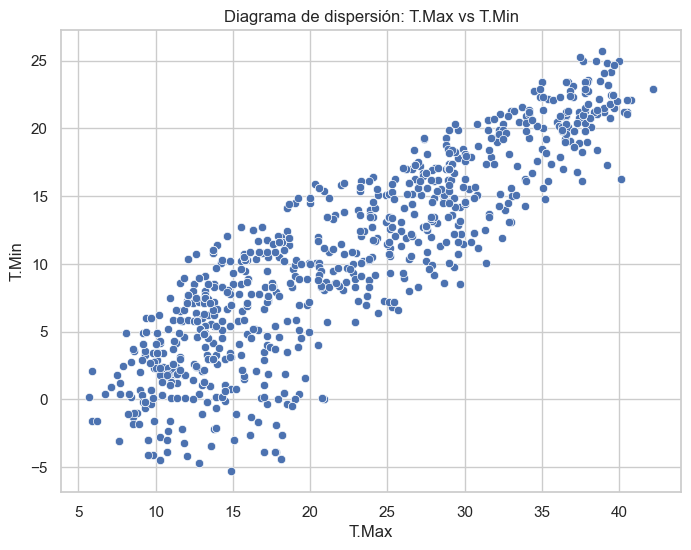

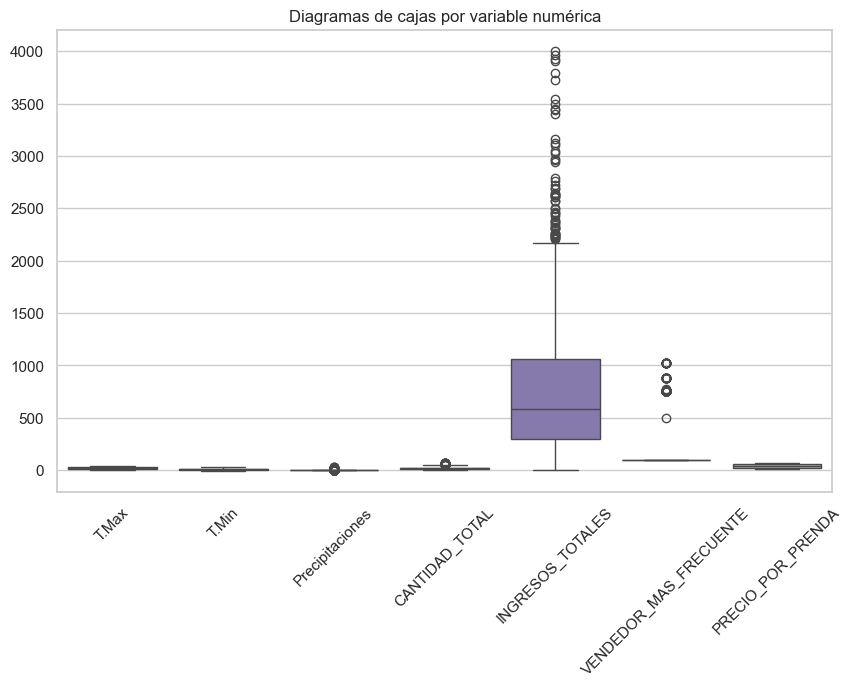

In [45]:
# 2. Gráficos descriptivos
print("\n--- Generando gráficos descriptivos ---\n")

# Gráfico de dispersión (scatterplot) para las dos primeras columnas numéricas
numeric_columns = df.select_dtypes(include=np.number).columns
if len(numeric_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numeric_columns[0]], y=df[numeric_columns[1]])
    plt.title(f"Diagrama de dispersión: {numeric_columns[0]} vs {numeric_columns[1]}")
    plt.show()

# Diagramas de cajas (boxplots) para visualizar la distribución de variables numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Diagramas de cajas por variable numérica")
plt.xticks(rotation=45)
plt.show()

In [46]:
# 3. Identificación de outliers
print("\n--- Identificación de outliers ---\n")
Q1 = df[numeric_columns].quantile(0.25)  # Primer cuartil
Q3 = df[numeric_columns].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | 
            (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Mostrar cuántos valores son outliers por columna
for col in numeric_columns:
    print(f"{col}: {outliers[col].sum()} valores atípicos detectados")



--- Identificación de outliers ---

T.Max: 0 valores atípicos detectados
T.Min: 0 valores atípicos detectados
Precipitaciones: 188 valores atípicos detectados
CANTIDAD_TOTAL: 49 valores atípicos detectados
INGRESOS_TOTALES: 59 valores atípicos detectados
VENDEDOR_MAS_FRECUENTE: 167 valores atípicos detectados
PRECIO_POR_PRENDA: 0 valores atípicos detectados


In [ ]:
#  Eliminar outliers
print("\n--- Eliminando outliers ---\n")
df_sin_outliers = df[~outliers.any(axis=1)]
print(f"Dimensiones después de eliminar outliers: {df_sin_outliers.shape}")

In [47]:
# 4. Valores nulos y sustitución
print("\n--- Valores nulos y su tratamiento ---\n")
print("Valores nulos por columna:")
print(df.isnull().sum())

# Sustitución de valores nulos
# Para columnas numéricas: rellenar con la media
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Para columnas categóricas: rellenar con la moda
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nValores nulos después de la sustitución:")
print(df.isnull().sum())


--- Valores nulos y su tratamiento ---

Valores nulos por columna:
FECHA                          0
T.Max                          0
T.Min                          0
Precipitaciones                0
CANTIDAD_TOTAL                 0
INGRESOS_TOTALES               0
COLOR_MAS_FRECUENTE          238
TALLA_MAS_FRECUENTE          238
DESCRIPCION_MAS_FRECUENTE    238
VENDEDOR_MAS_FRECUENTE       238
EN_REBAJAS                     0
PRECIO_POR_PRENDA              0
dtype: int64

Valores nulos después de la sustitución:
FECHA                        0
T.Max                        0
T.Min                        0
Precipitaciones              0
CANTIDAD_TOTAL               0
INGRESOS_TOTALES             0
COLOR_MAS_FRECUENTE          0
TALLA_MAS_FRECUENTE          0
DESCRIPCION_MAS_FRECUENTE    0
VENDEDOR_MAS_FRECUENTE       0
EN_REBAJAS                   0
PRECIO_POR_PRENDA            0
dtype: int64


/var/folders/bk/btd_ffsd3j767vj2_dsjyscm0000gn/T/ipykernel_40387/2648302332.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/var/folders/bk/btd_ffsd3j767vj2_dsjyscm0000gn/T/ipykernel_40387/2648302332.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [22]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv('datos_limpios.csv', index=False)
print("\nArchivo limpio guardado como 'datos_limpios.csv'")


Archivo limpio guardado como 'datos_limpios.csv'


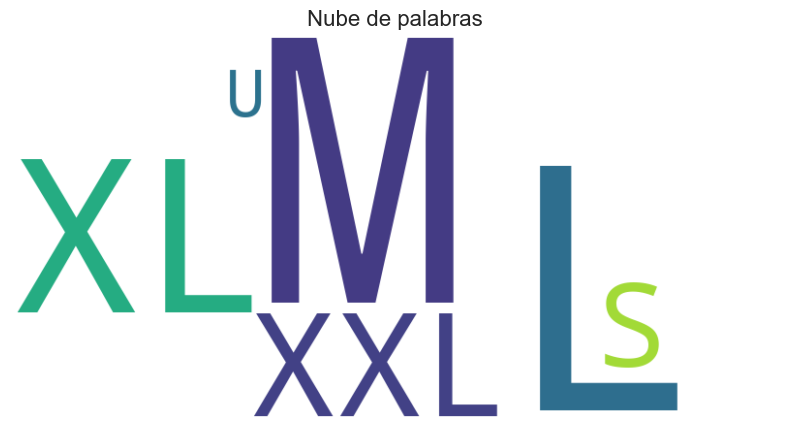

In [36]:
#Nubes de palabras
# Importar librerías necesarias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


# A partir de una columna de texto en un DataFrame ---
# Cargar datos desde un CSV
# Cambia 'archivo.csv' por la ruta a tu archivo y 'columna_texto' por el nombre de la columna
df = pd.read_csv('/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/MadridTempTiendas_def.csv', encoding='latin-1')

# Concatenar todas las filas de la columna de texto
texto_concatenado = " ".join(df['TALLA_MAS_FRECUENTE'].dropna().astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    colormap="viridis"
).generate(texto_concatenado)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras ", fontsize=16)
plt.show()

In [48]:
import pandas as pd
df=pd.read_csv('/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/LeganesTempTiendas_def.csv', encoding="latin-1")
df.set_index('FECHA', inplace=True)

# Función para rellenar valores NaN con la media de los 15 días anteriores y posteriores
def fill_nan_with_rolling_mean(df, window=15):
    def rolling_mean_fill(series):
        return series.fillna(series.rolling(window=window * 2 + 1, center=True, min_periods=1).mean())
    
    df['CANTIDAD_TOTAL'] = rolling_mean_fill(df['CANTIDAD_TOTAL'])
    return df

# Aplicar la función
df_filled = fill_nan_with_rolling_mean(df)

# Mostrar el resultado
print(df_filled)

            T.Max  T.Min  Precipitaciones  CANTIDAD_TOTAL  INGRESOS_TOTALES  \
FECHA                                                                         
2022-01-01   17.2   -0.3              0.0        0.000000          0.000000   
2022-01-02   14.5   -0.1              0.0        0.000000          0.000000   
2022-01-03   14.5    1.1              0.0        5.354062        247.174564   
2022-01-03   14.5    1.1              0.0        9.960311        425.235450   
2022-01-04   12.8    0.4              5.8        3.714879        131.578378   
...           ...    ...              ...             ...               ...   
2023-12-29    8.5    3.7              0.0        3.252600        193.279463   
2023-12-30   10.7    1.8              0.0        7.615410        182.513653   
2023-12-31    9.4    5.0              0.0        6.625433        189.737528   
2023-12-31    9.4    5.0              0.0        8.214606        472.123379   
2023-12-31    9.4    5.0              0.0        4.0

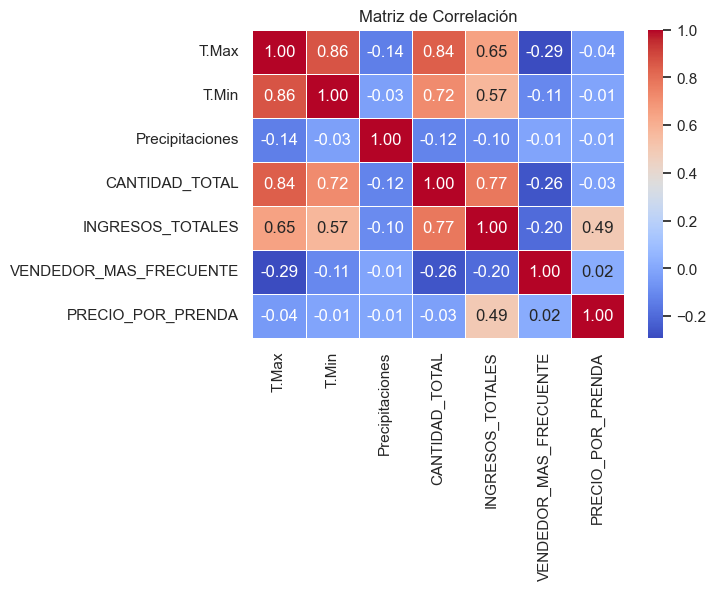

In [49]:
#Matriz de correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear un DataFrame de ejemplo con temperaturas y ventas
df_filled= df

# Seleccionar sólo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación sólo con las columnas numéricas
correlacion = df_numeric.corr()

# Mostrar la matriz de correlación como heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de gráficos
sns.set(style="whitegrid")

# 1. Carga de Datos
# Reemplaza 'data.csv' con la ruta de tu archivo
file_path = '/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/MadridTempTiendas_def.csv'
df = pd.read_csv(file_path, encoding='latin-1')
# Verificación de que la columna 'fecha' existe en el DataFrame
if 'FECHA' in df.columns:
    # Eliminación de duplicados basada en la columna 'fecha'
    df = df.drop_duplicates(subset='FECHA', keep='first')
    print("Duplicados eliminados basados en la columna 'fecha'.")
    print("\nDimensiones del dataset después de eliminar duplicados:", df.shape)
else:
    print("La columna 'fecha' no existe en el DataFrame.")



# 2. Comprensión de la Estructura de los Datos
print("\nDimensiones del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes)
print("\nPrimeras filas:\n", df.head())
print("\nÚltimas filas:\n", df.tail())

# Verificación de que la columna 'cantidad_total' existe en el DataFrame
df.describe()
if 'CANTIDAD_TOTAL' in df.columns:
    # Cálculo de estadísticas descriptivas para 'cantidad_total'
    cantidad_total_stats = df['CANTIDAD_TOTAL'].describe()
    media= df["CANTIDAD_TOTAL"].mean()
    varianza = df['CANTIDAD_TOTAL'].var()  # Varianza
    std_dev = df['CANTIDAD_TOTAL'].std()   # Desviación típica
    
    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas para 'cantidad_total':")
    print(cantidad_total_stats)
    print("\nMedia de 'cantidad_total':", media)
    print("\nVarianza de 'cantidad_total':", varianza)
    print("Desviación Típica de 'cantidad_total':", std_dev)

    # Mediana y cuartiles ya están incluidos en 'describe()', pero se pueden imprimir por separado si es necesario
    mediana = df['CANTIDAD_TOTAL'].median()
    print("Mediana de 'cantidad_total':", mediana)







Duplicados eliminados basados en la columna 'fecha'.

Dimensiones del dataset después de eliminar duplicados: (730, 12)

Dimensiones del dataset: (730, 12)

Tipos de datos:
 FECHA                         object
T.Max                        float64
T.Min                        float64
Precipitaciones              float64
CANTIDAD_TOTAL               float64
INGRESOS_TOTALES             float64
COLOR_MAS_FRECUENTE           object
TALLA_MAS_FRECUENTE           object
DESCRIPCION_MAS_FRECUENTE     object
VENDEDOR_MAS_FRECUENTE       float64
EN_REBAJAS                      bool
PRECIO_POR_PRENDA            float64
dtype: object

Primeras filas:
         FECHA  T.Max  T.Min  Precipitaciones  CANTIDAD_TOTAL  \
0  2022-01-01   17.2   -0.3              0.0       27.968866   
1  2022-01-02   14.5   -0.1              0.0       21.953093   
2  2022-01-03   14.5    1.1              0.0       23.780975   
3  2022-01-04   12.8    0.4              5.8        0.000000   
4  2022-01-05   10.1    3.5   

In [27]:
df.describe()

T.Max       T.Min  Precipitaciones  CANTIDAD_TOTAL  \
count  730.000000  730.000000       730.000000      730.000000   
mean    24.692758    8.774944         1.021448       45.719554   
std      8.208453    6.806731         3.810668       24.141807   
min      9.100000   -4.700000         0.000000        0.000000   
25%     17.700000    4.100000         0.000000       29.272767   
50%     24.350000    8.800000         0.000000       43.928065   
75%     30.700000   13.575000         0.000000       61.677989   
max     44.500000   25.500000        41.000000      116.147804   

       INGRESOS_TOTALES  VENDEDOR_MAS_FRECUENTE  PRECIO_POR_PRENDA  
count        730.000000                   730.0         730.000000  
mean        1818.342710                    98.0          39.661582  
std         1308.911943                     0.0          17.529717  
min            0.000000                    98.0          10.162193  
25%          840.165767                    98.0          24.732472  
50%         1517.048745                    98.0          38.680504  
75%         2584.605000                    98.0          53.805350  
max         7742.684787                    98.0          69.956680


Estadísticas descriptivas (variables numéricas):
             T.Max       T.Min  Precipitaciones  CANTIDAD_TOTAL  \
count  786.000000  786.000000       786.000000      786.000000   
mean    22.001145   10.469338         0.704835       45.028008   
std      9.206355    7.101335         2.751468       24.490917   
min      5.700000   -5.300000         0.000000        0.000000   
25%     13.800000    4.925000         0.000000       25.996111   
50%     20.700000   10.300000         0.000000       41.751057   
75%     29.000000   16.075000         0.000000       62.301053   
max     42.200000   25.700000        27.500000      109.595484   

       INGRESOS_TOTALES  VENDEDOR_MAS_FRECUENTE  PRECIO_POR_PRENDA  
count        786.000000              531.000000         786.000000  
mean        1866.343597              174.359699          41.137621  
std         1404.569645              220.530323          17.973157  
min            0.000000               98.000000          10.022041  
25%      

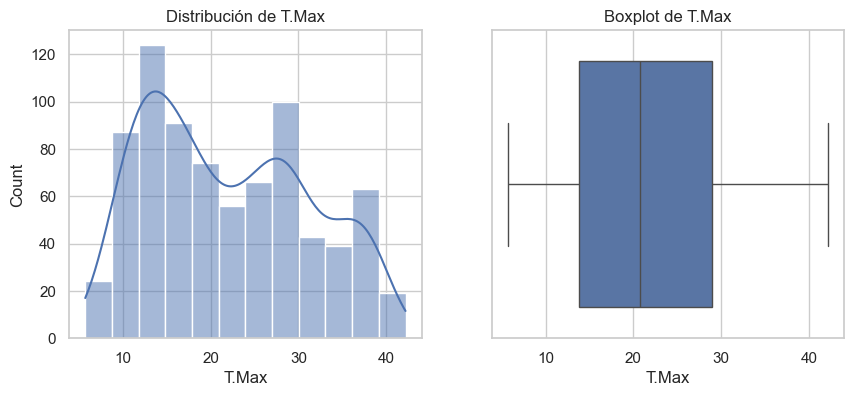

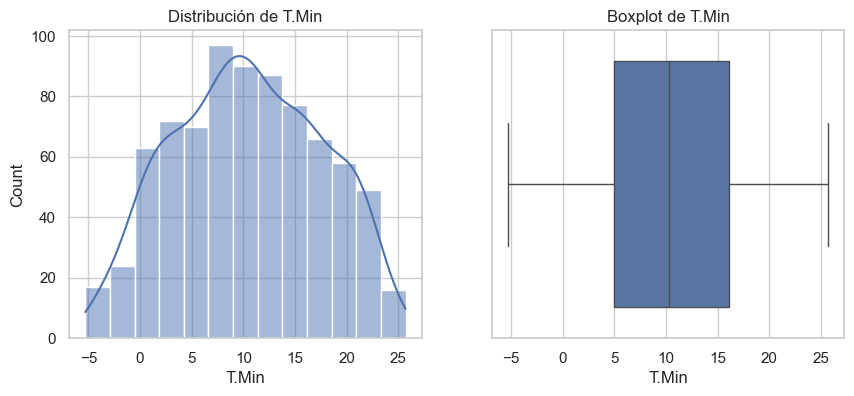

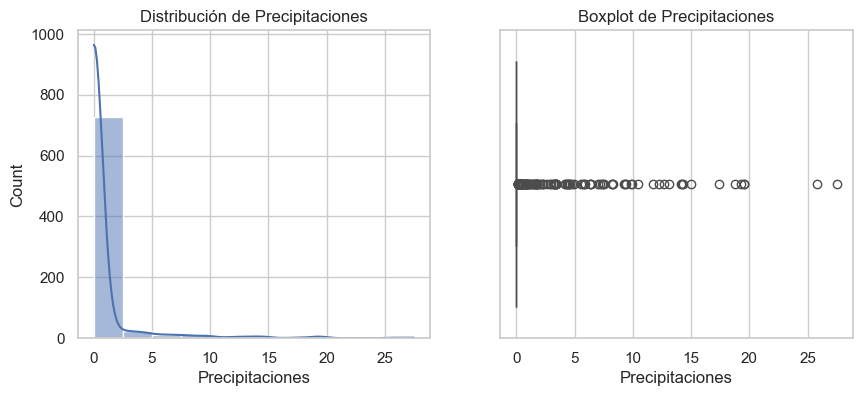

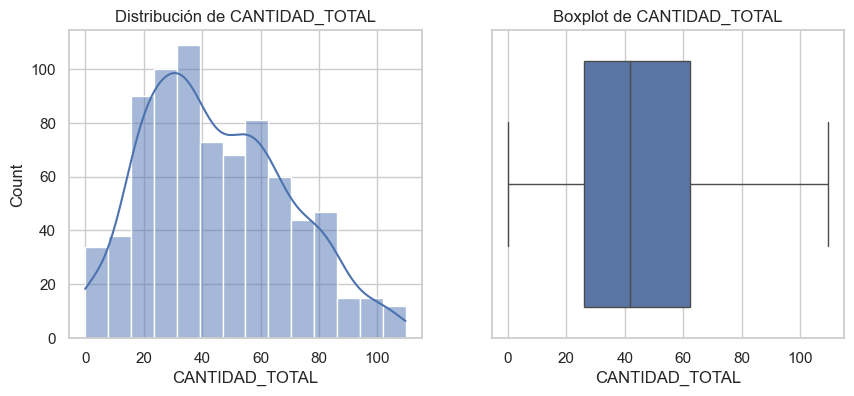

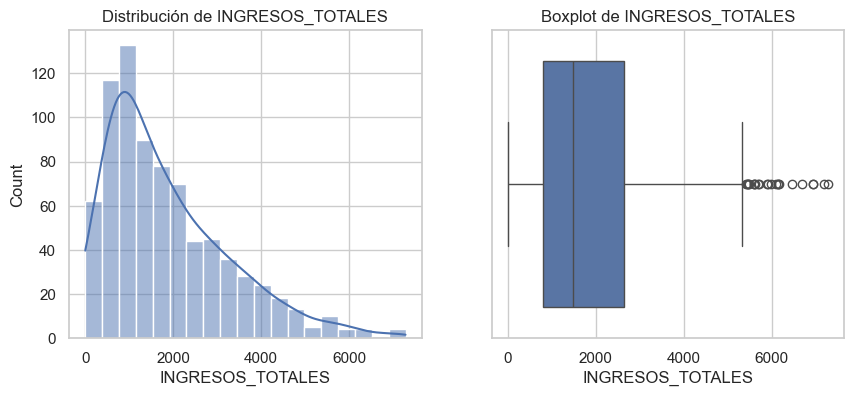

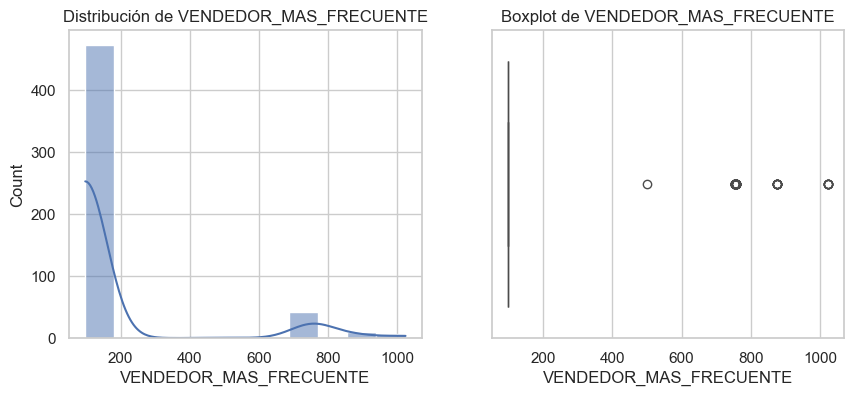

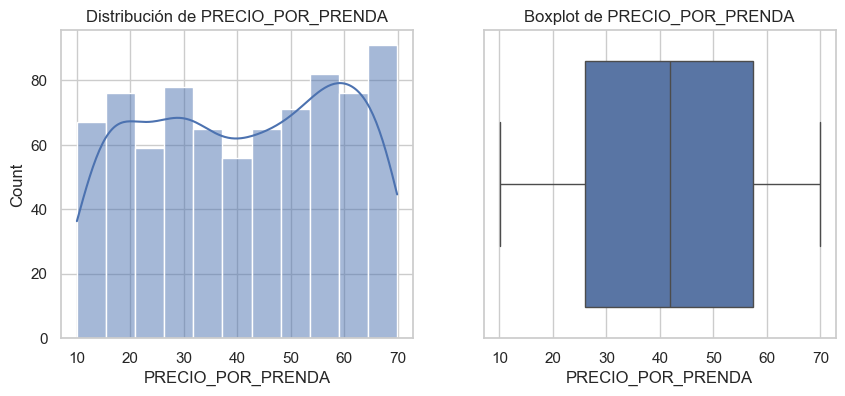

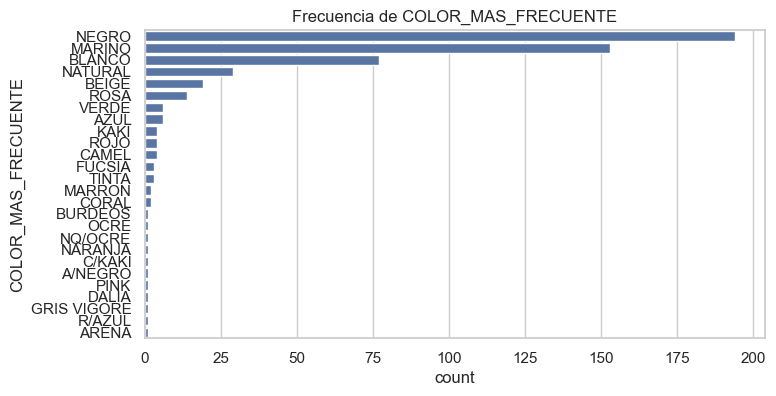

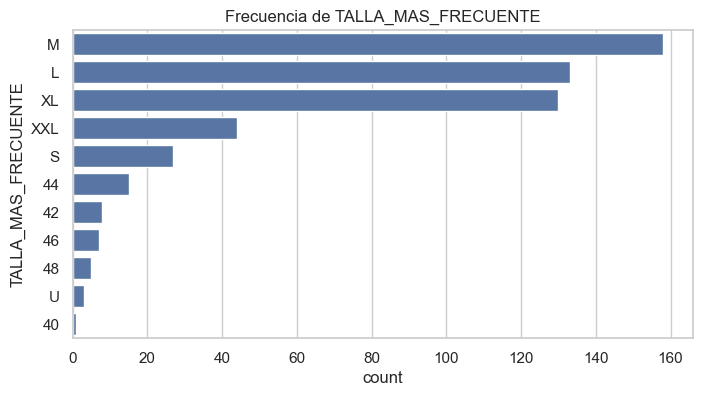

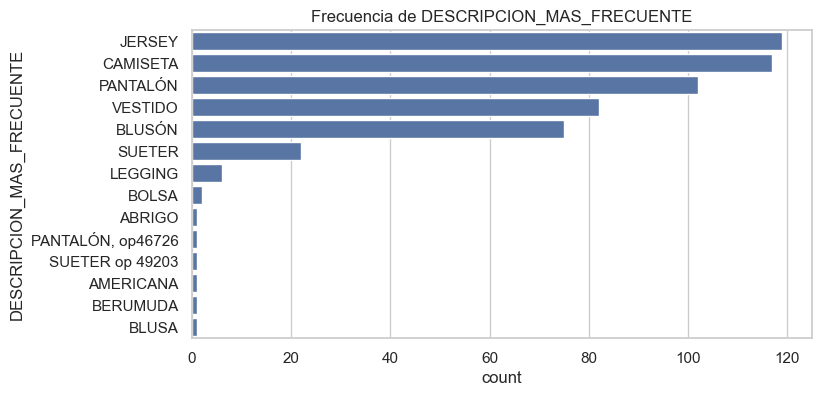

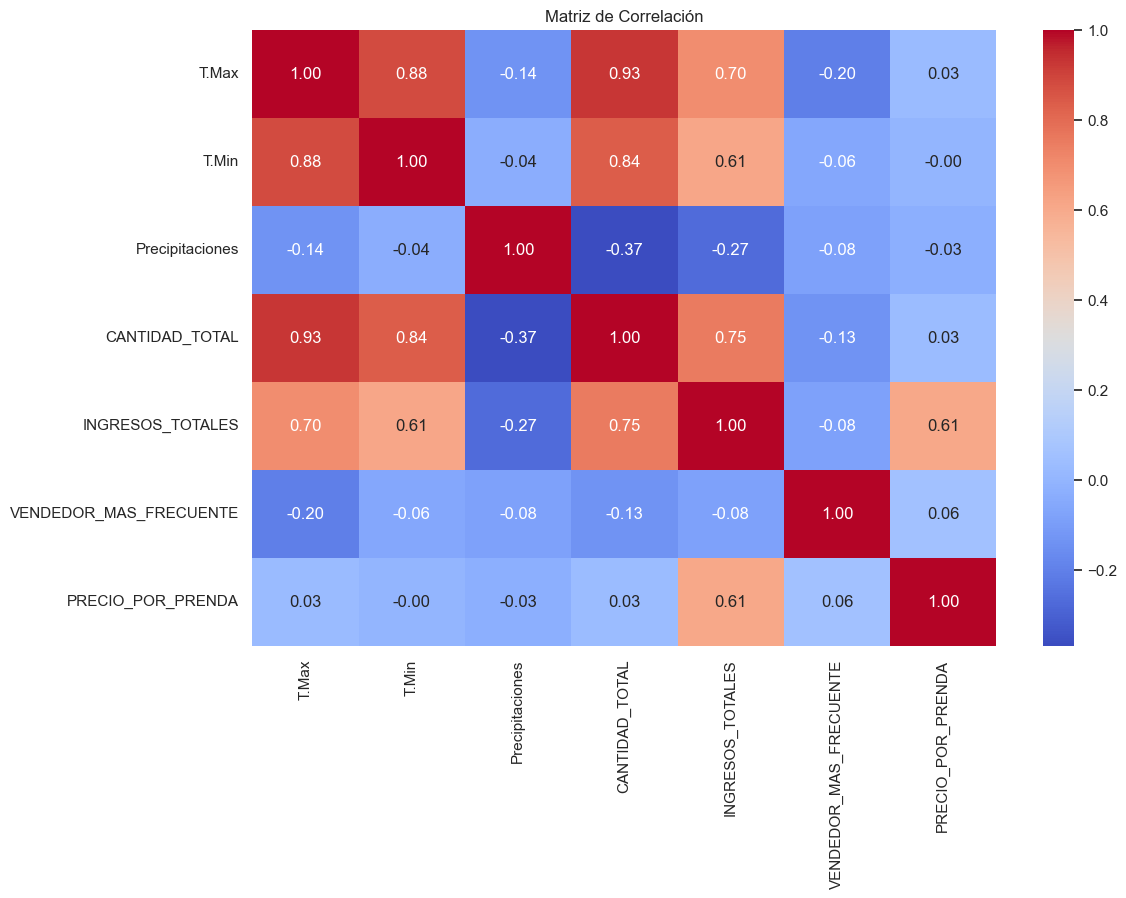

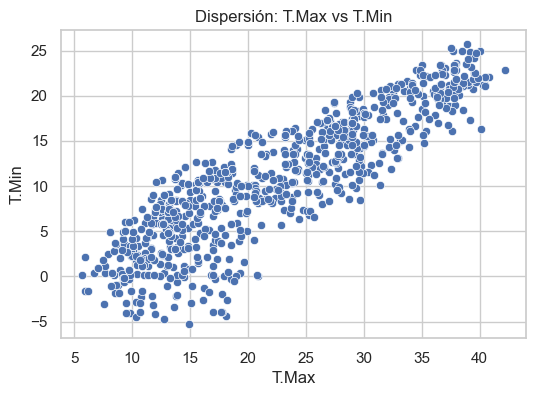

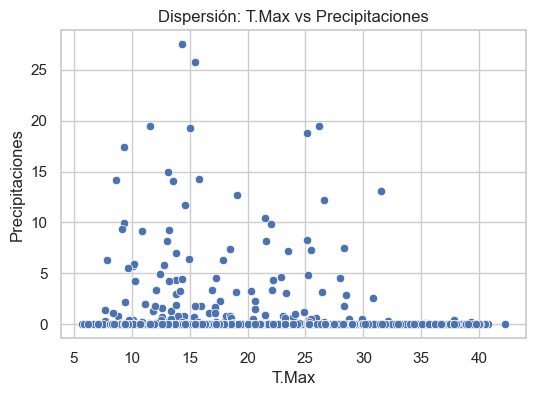

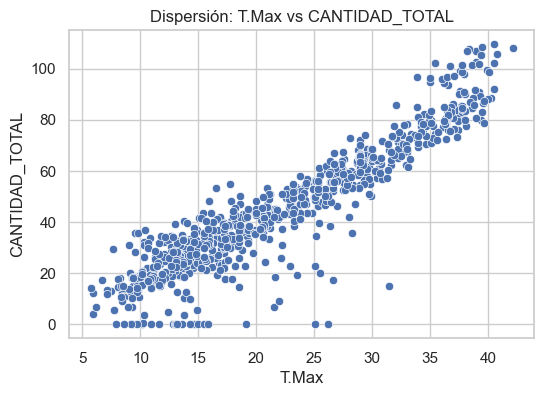

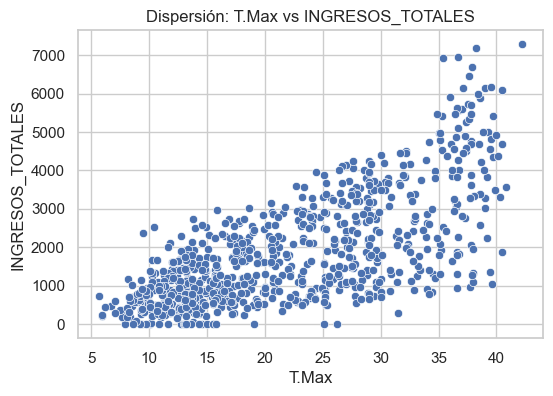

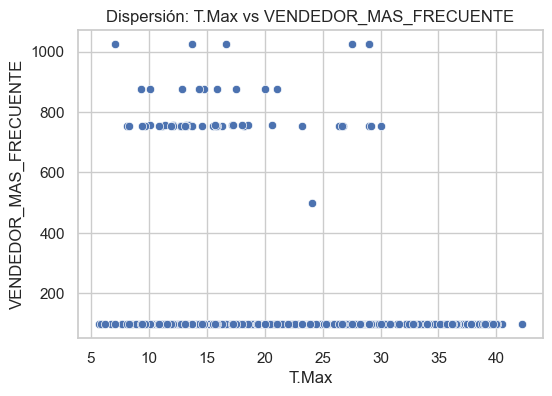

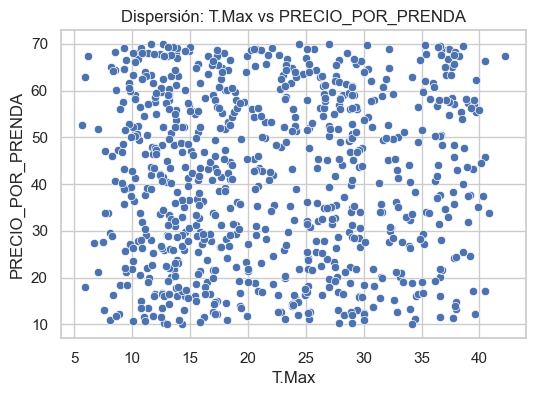

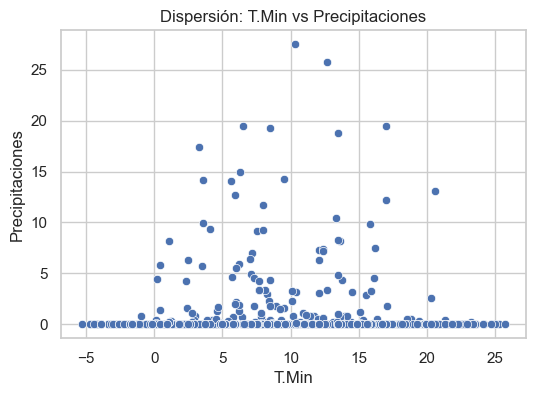

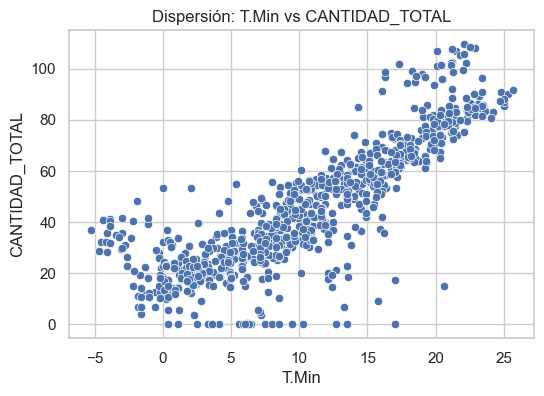

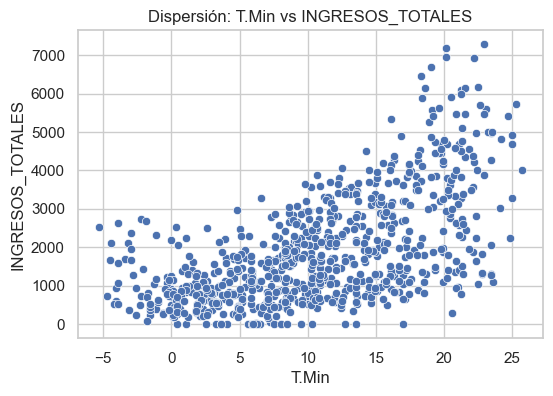

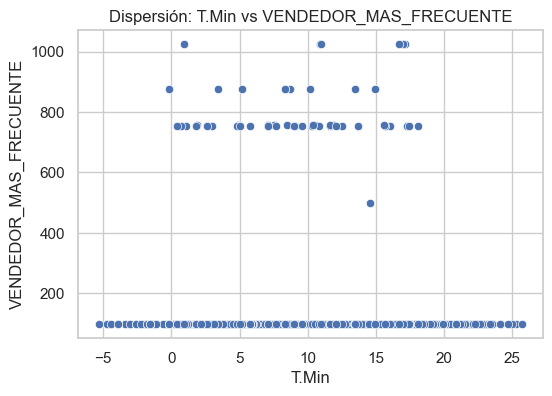

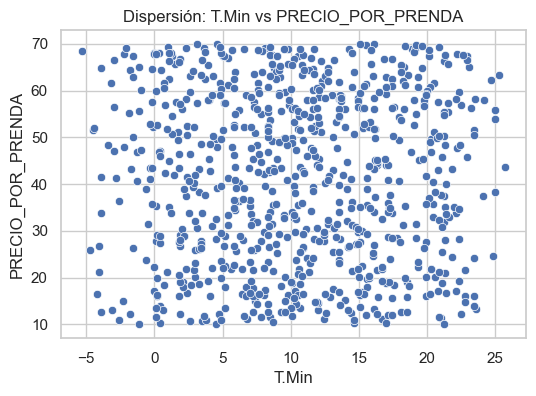

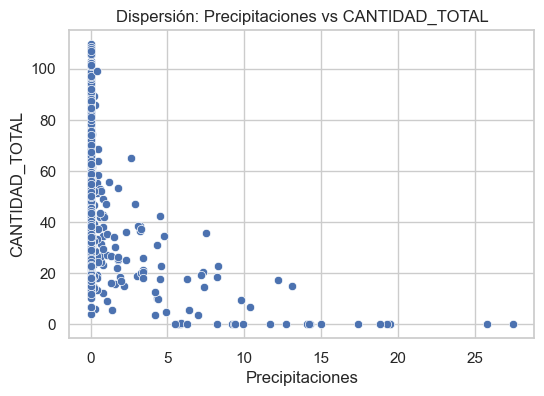

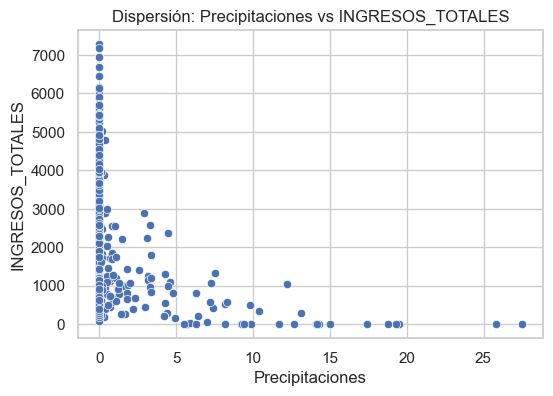

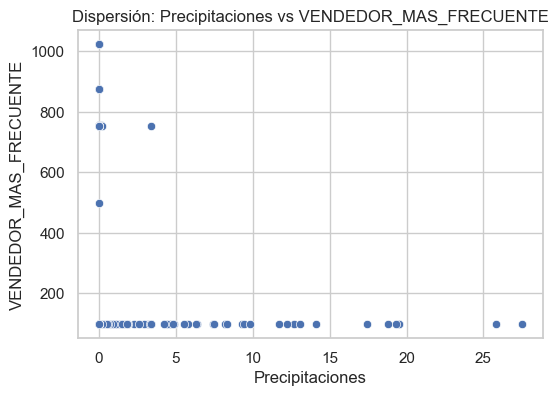

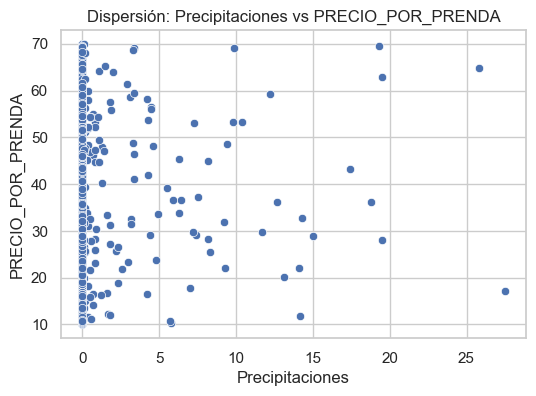

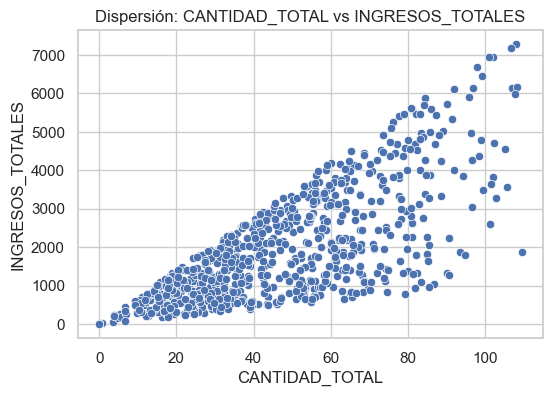

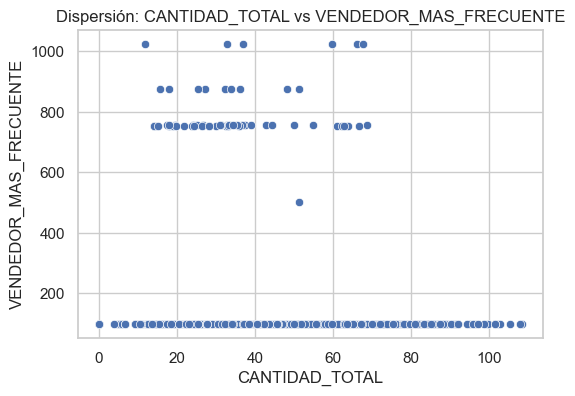

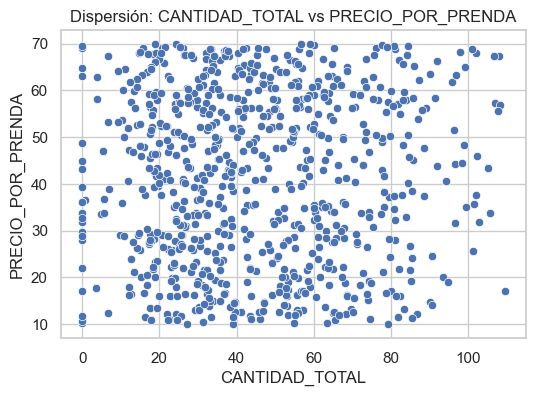

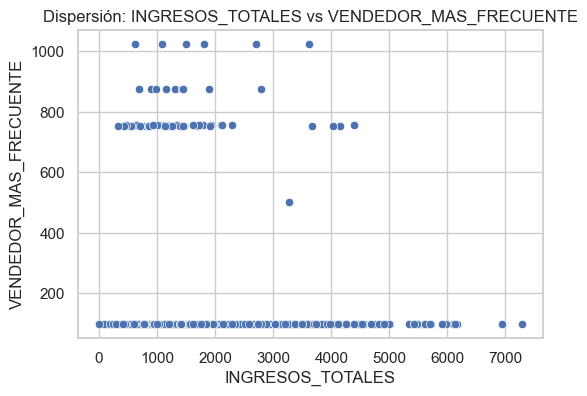

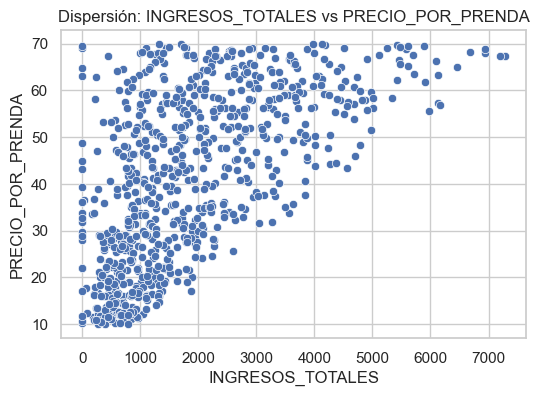

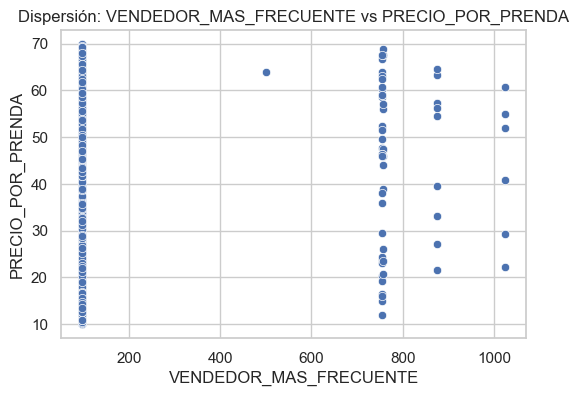

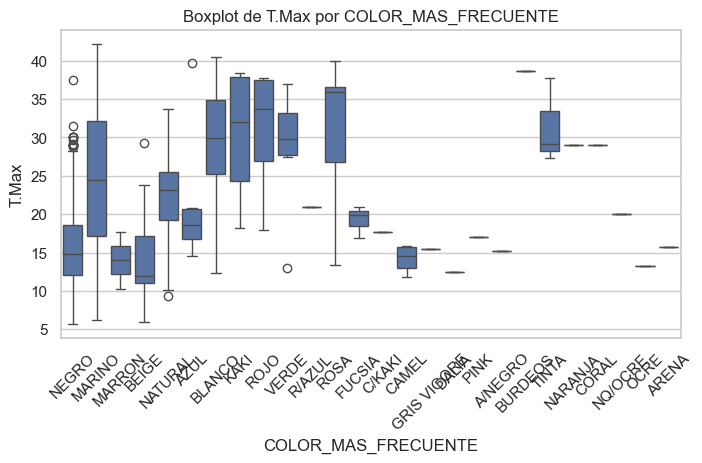

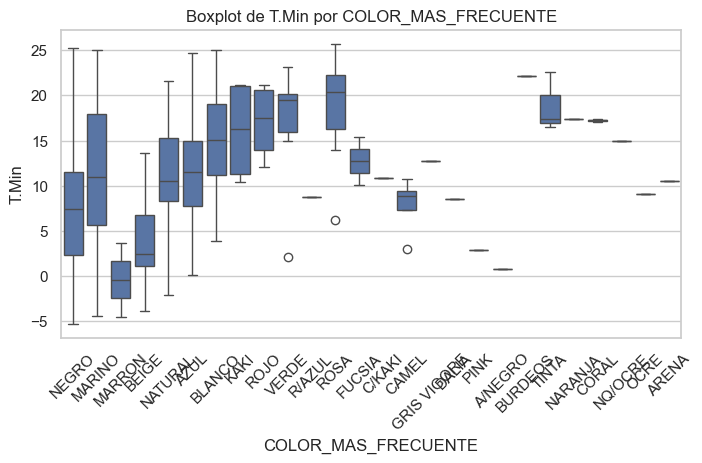

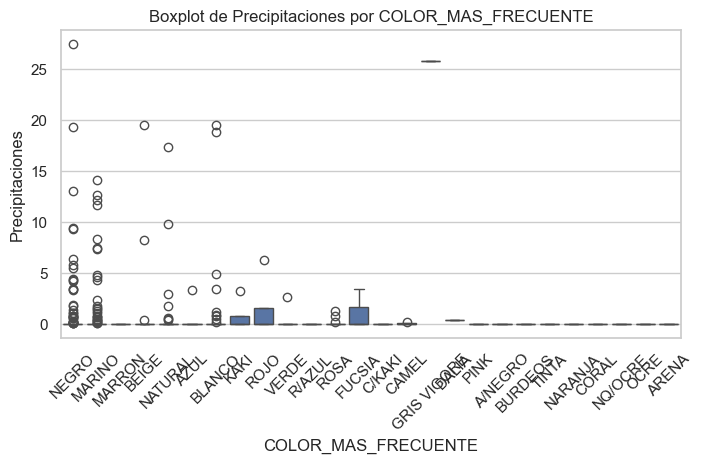

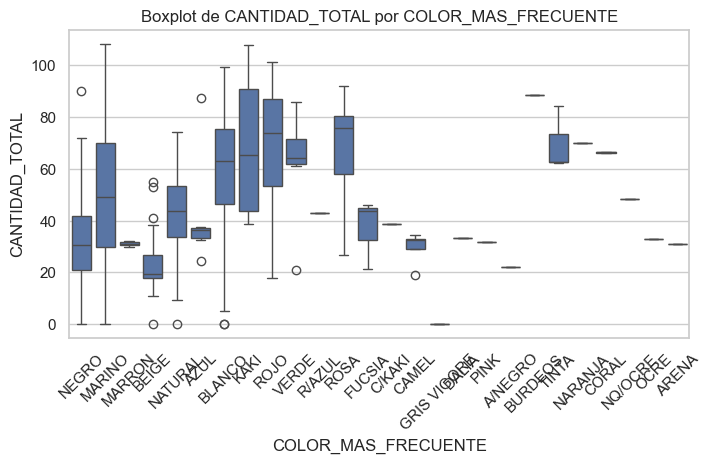

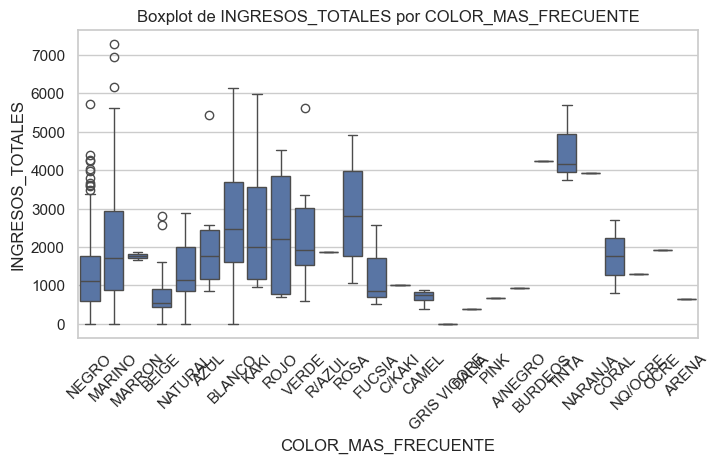

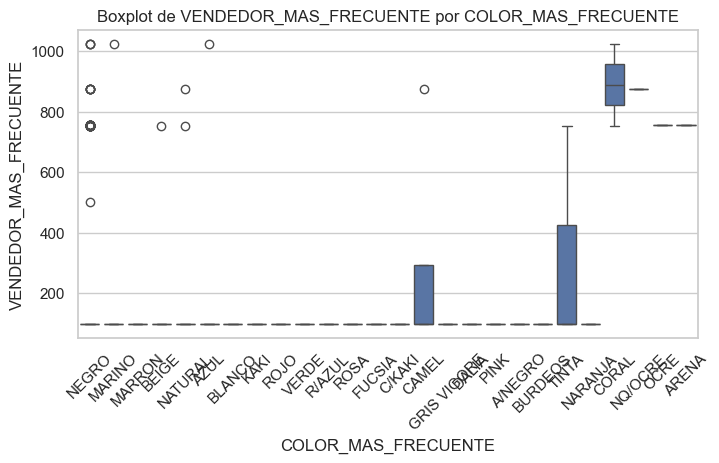

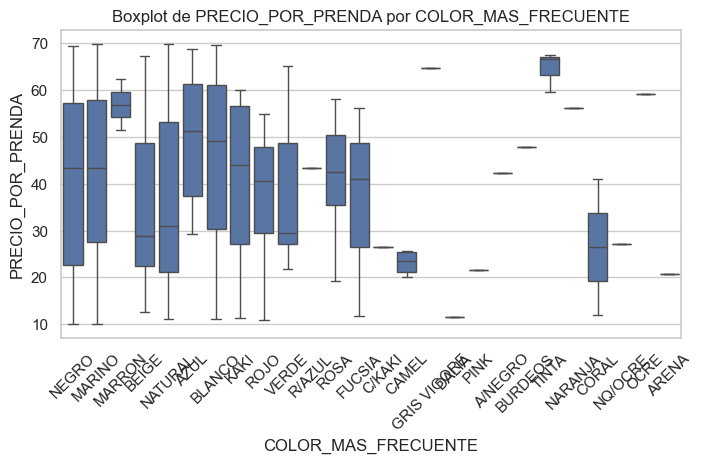

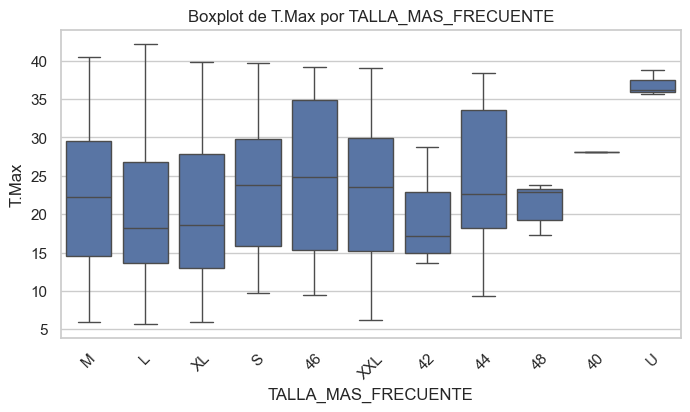

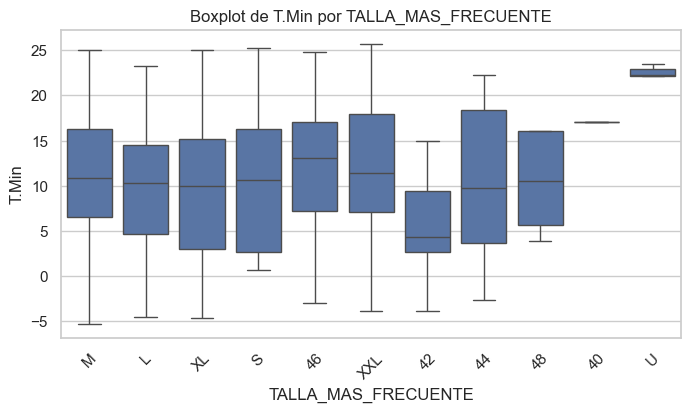

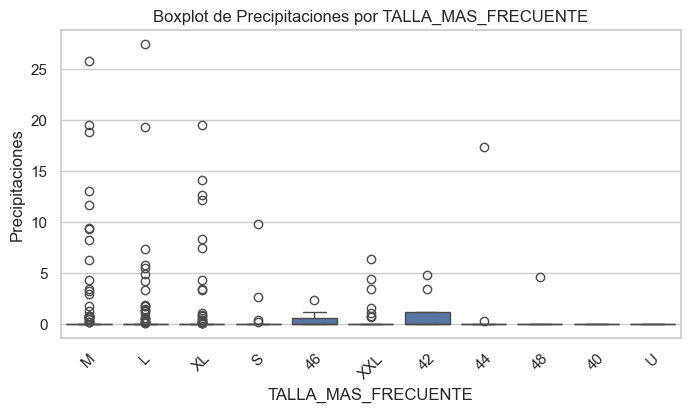

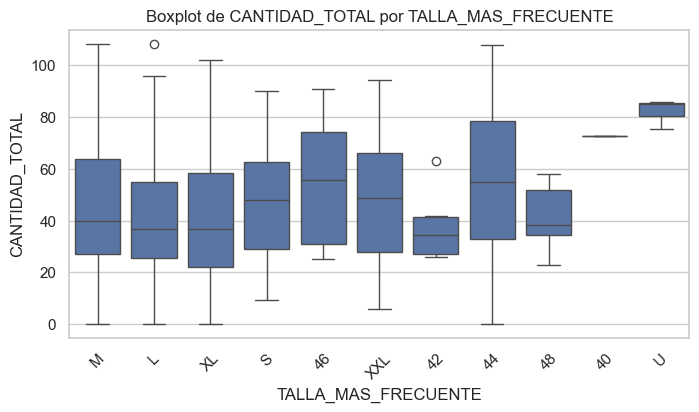

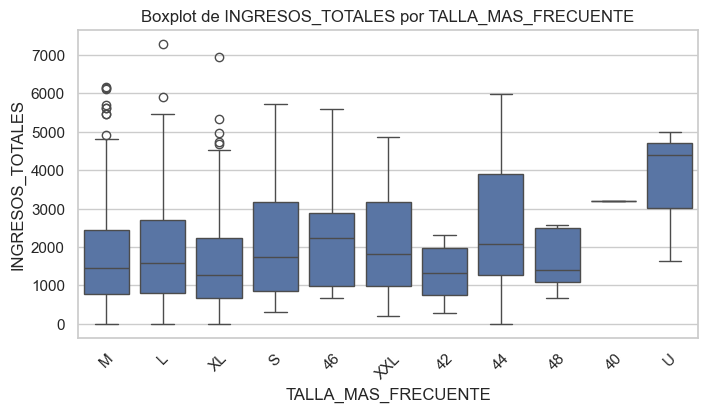

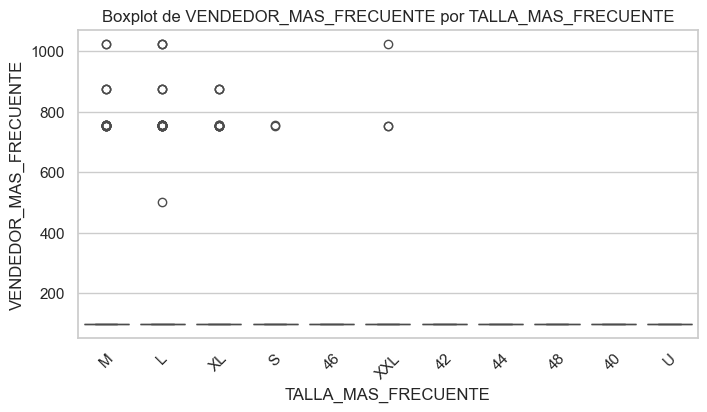

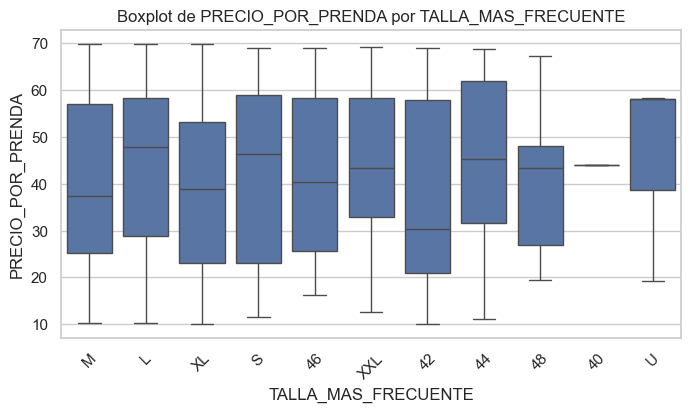

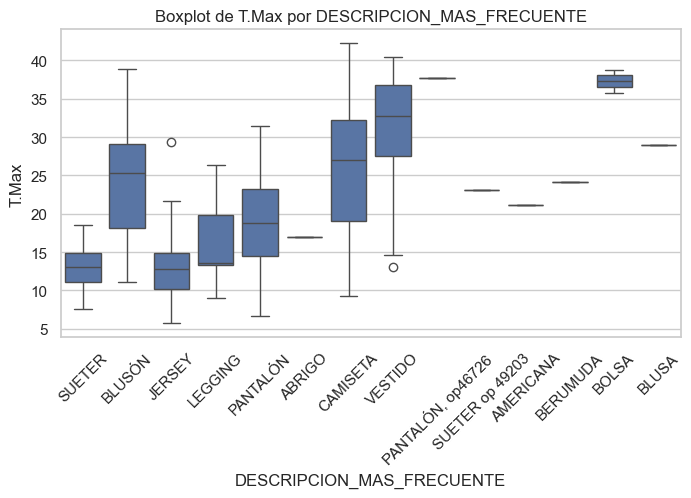

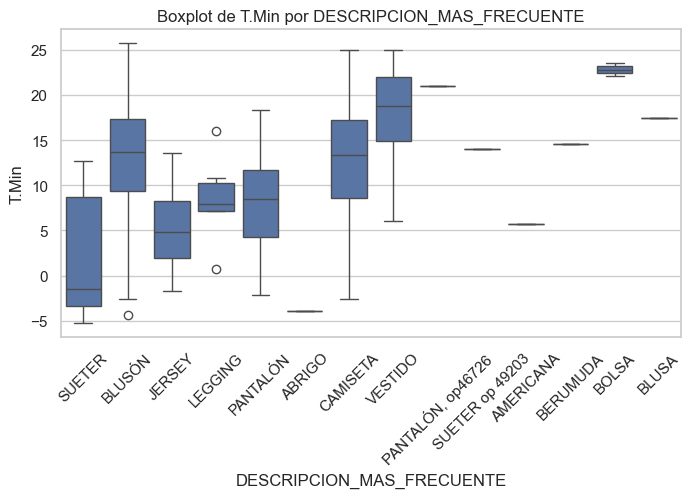

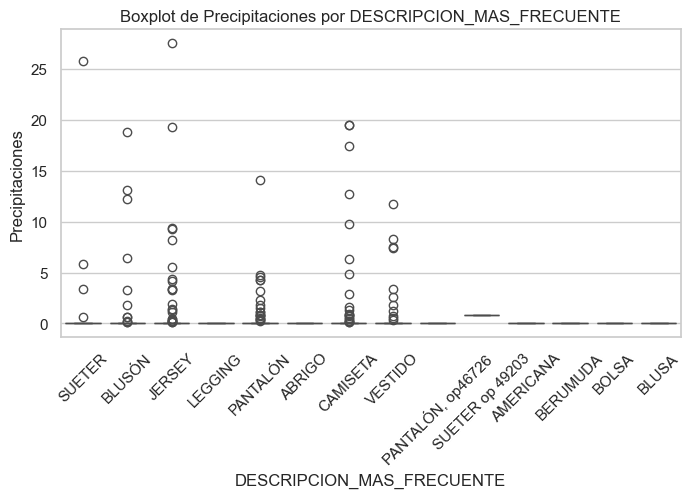

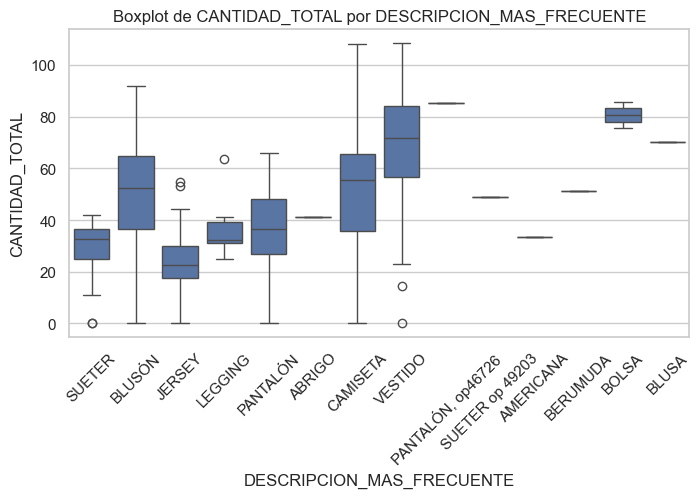

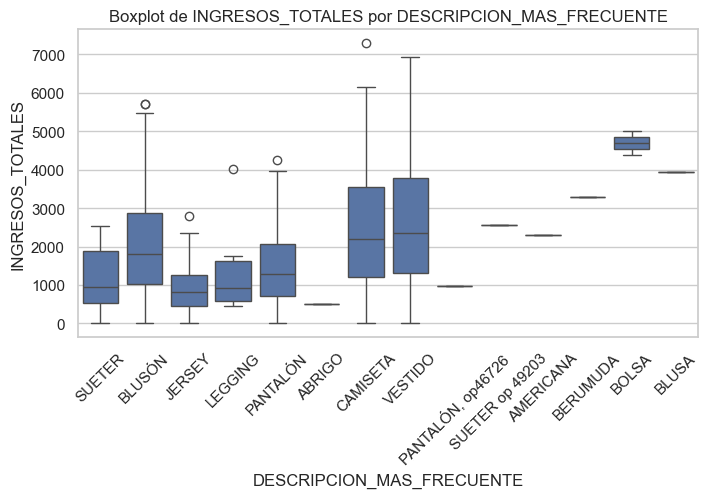

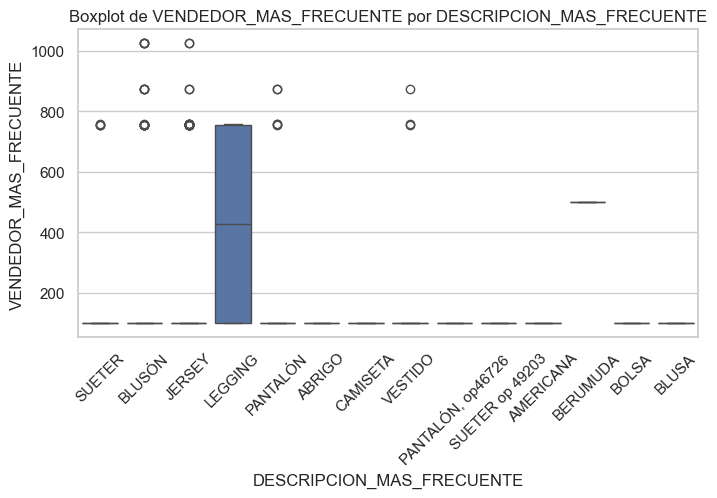

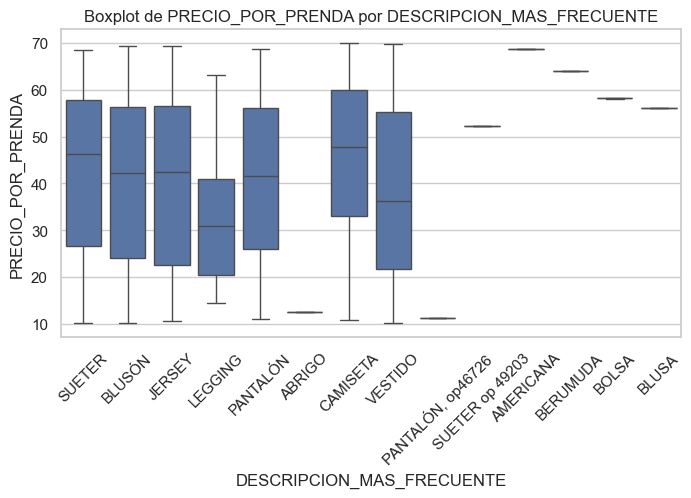

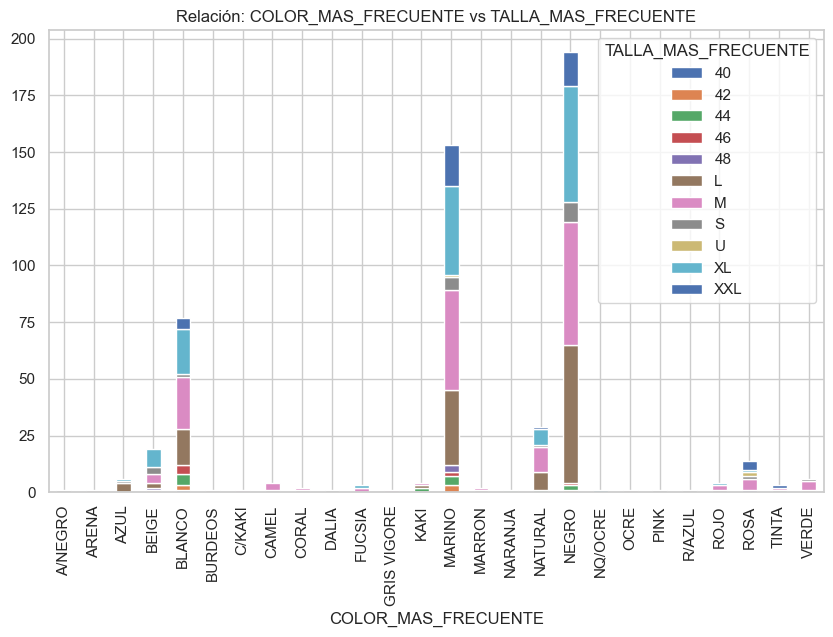

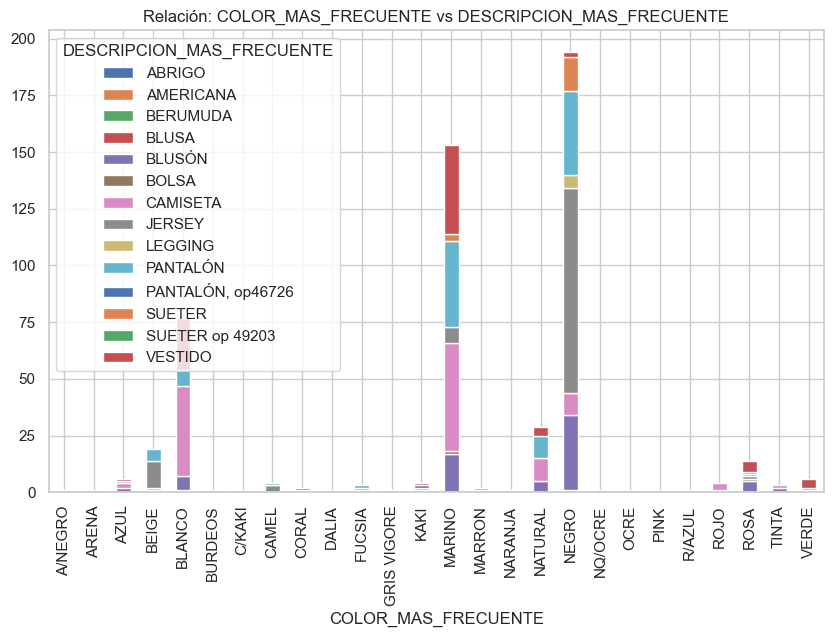

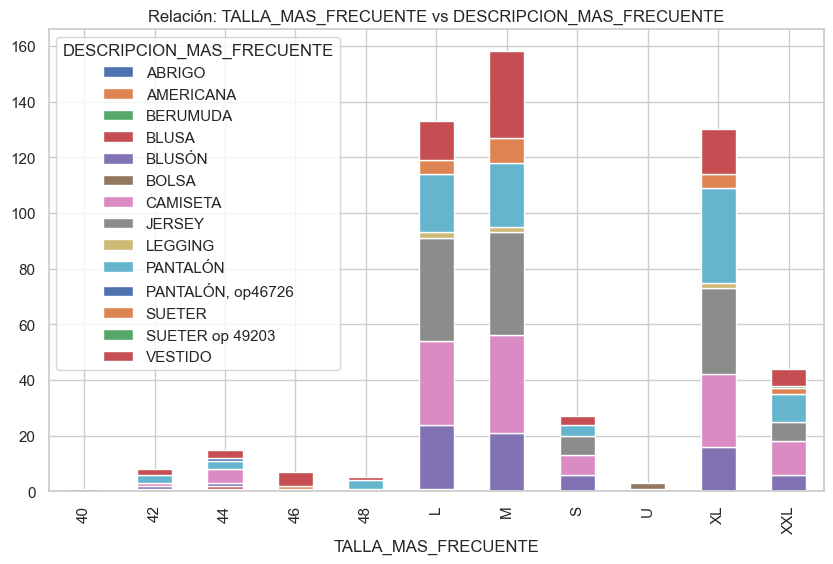

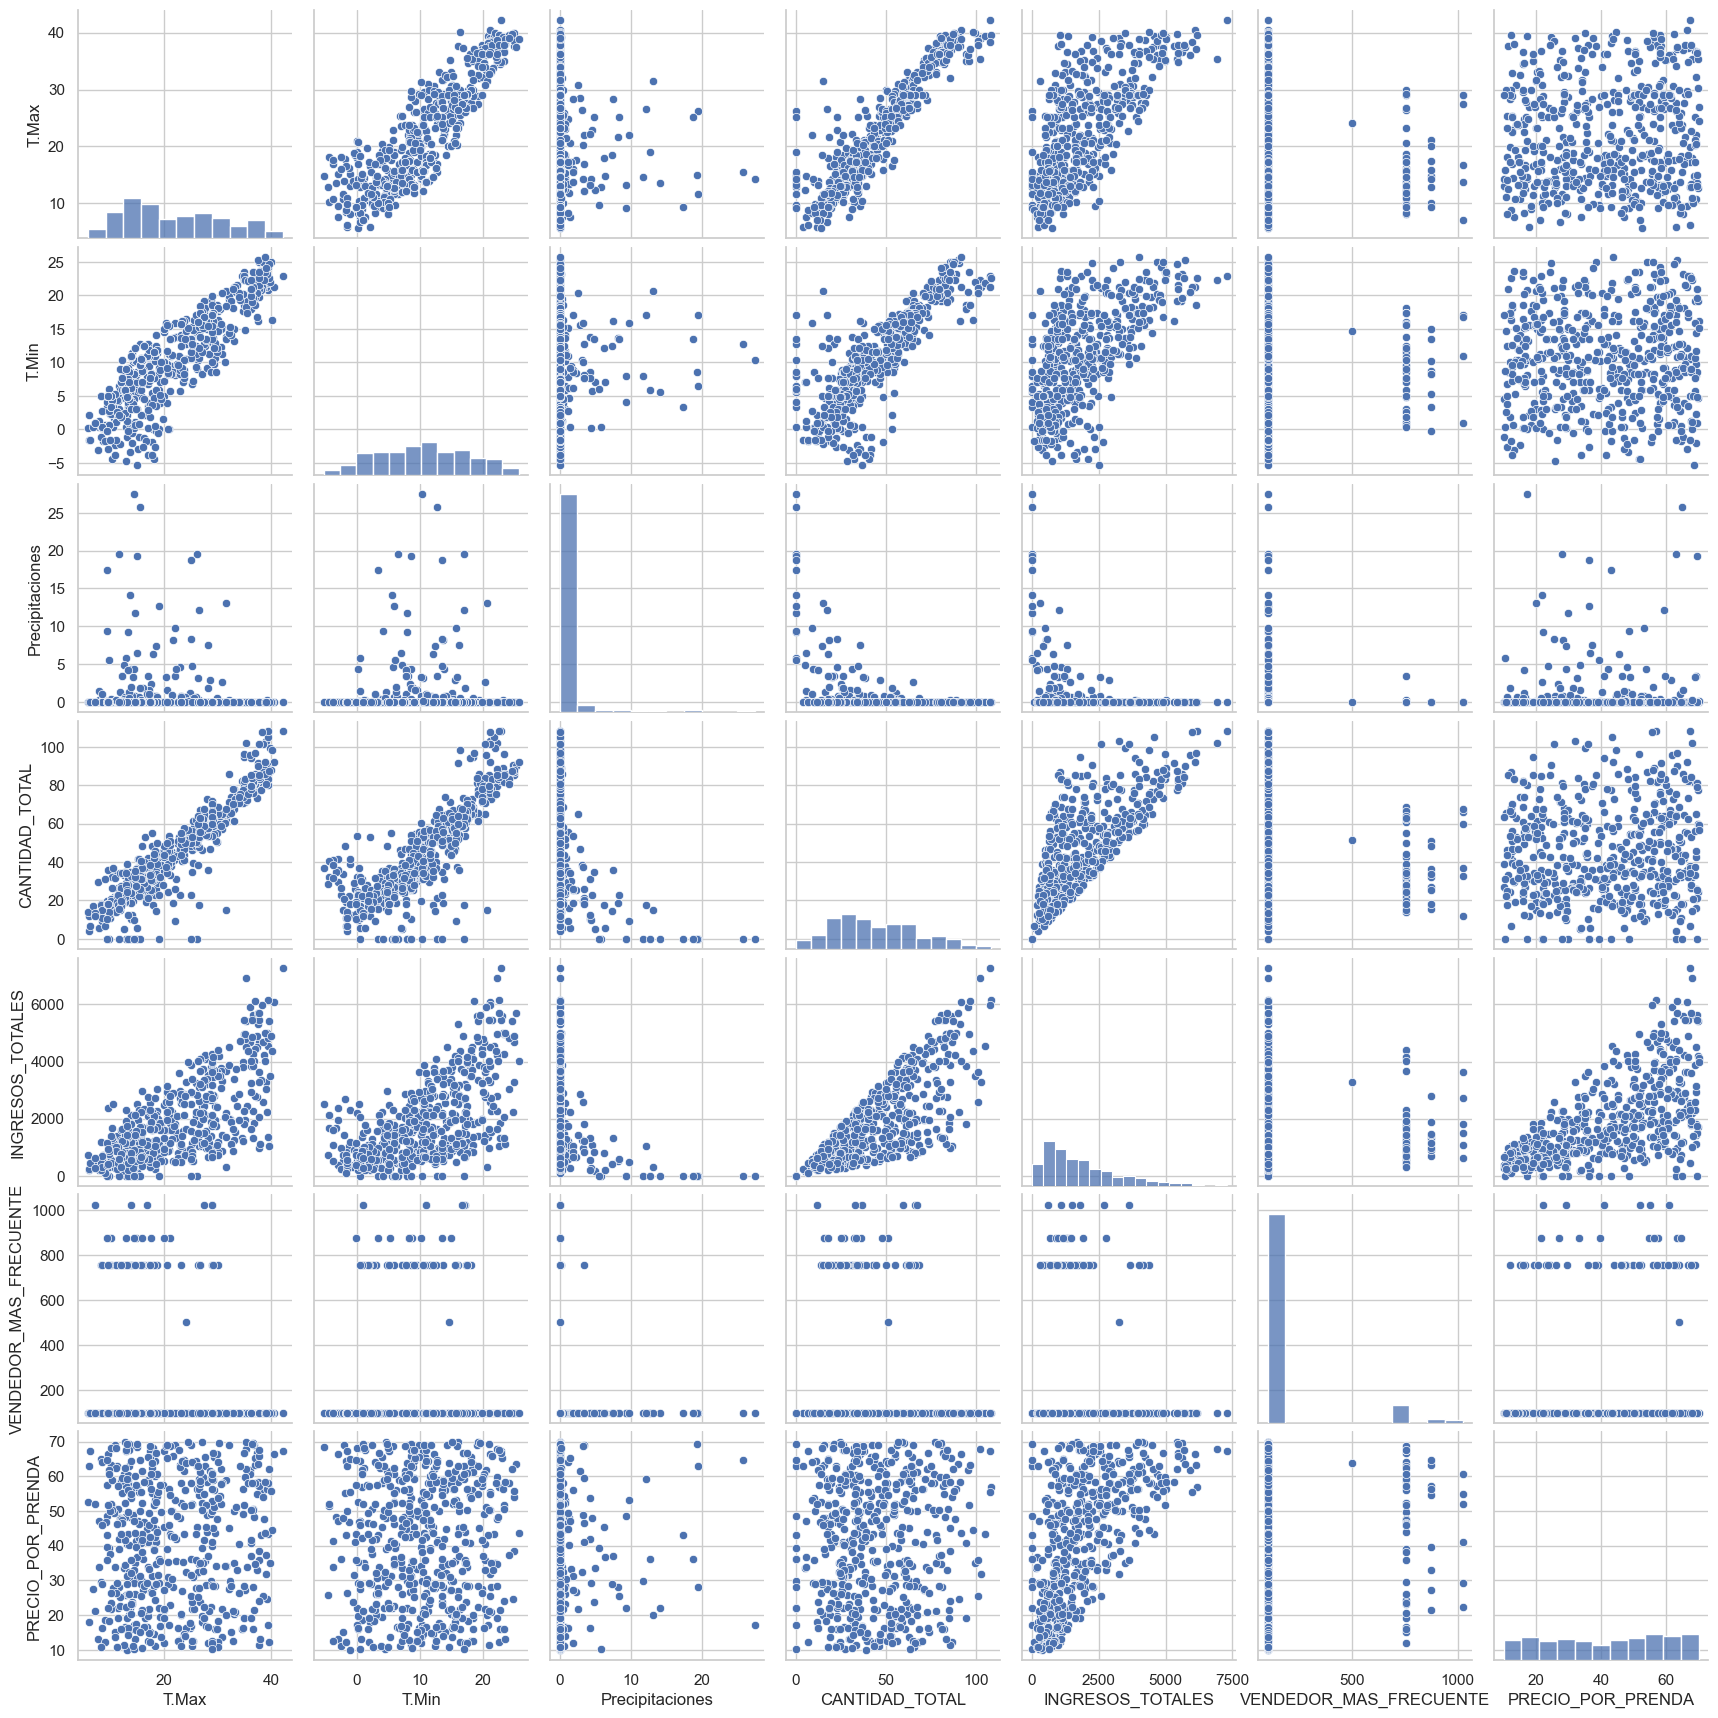


Conclusiones preliminares:
- Revisa las correlaciones significativas.
- Identifica patrones en series temporales si existen.
- Observa outliers en los boxplots.


In [41]:
# 3. Análisis Univariado (excluyendo la columna 'fecha')
# Variables numéricas
df=pd.read_csv("/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BBDD/MadridTempTiendas_def.csv", encoding="latin-1")
num_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col.lower() != 'fecha']
print("\nEstadísticas descriptivas (variables numéricas):\n", df[num_cols].describe())

for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Variables categóricas
cat_cols = [col for col in df.select_dtypes(include=['object', 'category']).columns if col.lower() != 'fecha']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.show()# 4. Análisis Bivariado
# Numérica vs Numérica
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Diagramas de dispersión
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]])
        plt.title(f'Dispersión: {num_cols[i]} vs {num_cols[j]}')
        plt.show()

# Numérica vs Categórica
for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'Boxplot de {num} por {cat}')
        plt.xticks(rotation=45)
        plt.show()

# Categórica vs Categórica
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        cross_tab = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Relación: {cat_cols[i]} vs {cat_cols[j]}')
        plt.show()

# 5. Análisis Multivariado
# Pairplot para relaciones entre múltiples variables numéricas
sns.pairplot(df[num_cols].dropna())
plt.show()

# 6. Transformación de Datos (Feature Engineering)
# Ejemplo: extraer características de una fecha si existe
if any(df.dtypes == 'datetime64[ns]'):
    date_col = df.select_dtypes(include=['datetime64']).columns[0]
    df['Year'] = df[date_col].dt.year
    df['Month'] = df[date_col].dt.month
    df['Day'] = df[date_col].dt.day
    df['Weekday'] = df[date_col].dt.weekday

    print(df[['Year', 'Month', 'Day', 'Weekday']].head())

# 7. Detección de Patrones y Tendencias (Series Temporales si aplica)
if any(df.dtypes == 'datetime64[ns]'):
    plt.figure(figsize=(12, 6))
    df.set_index(date_col)[num_cols].plot()
    plt.title('Tendencias Temporales')
    plt.show()

# 8. Insights y Conclusiones Preliminares
print("\nConclusiones preliminares:")
print("- Revisa las correlaciones significativas.")
print("- Identifica patrones en series temporales si existen.")
print("- Observa outliers en los boxplots.")



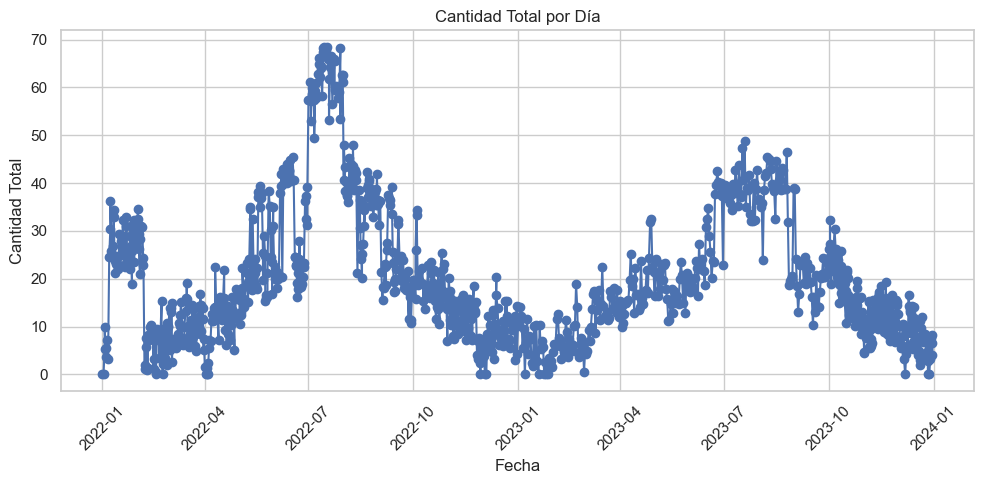

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/LeganesTempTiendas_def.csv'
df = pd.read_csv(file_path)
# Asegurarse de que la columna de fecha es de tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Ordenar el DataFrame por la columna de fecha, si no está ordenado
df = df.sort_values('FECHA')

# Crear un gráfico de líneas con días en el eje X y cantidad total en el eje Y
plt.figure(figsize=(10, 5))  # Ajusta el tamaño del gráfico según necesidad
plt.plot(df['FECHA'], df['CANTIDAD_TOTAL'], marker='o', linestyle='-')  # Ajusta el tipo de marcador y línea si es necesario
plt.title('Cantidad Total por Día')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Cantidad Total')  # Etiqueta del eje Y
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor visualización
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para que el gráfico encaje en la figura
plt.show()  # Muestra el gráfico


<Figure size 1200x600 with 0 Axes>

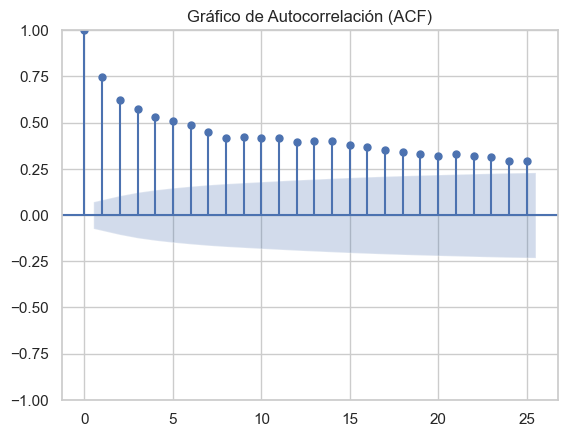

<Figure size 1200x600 with 0 Axes>

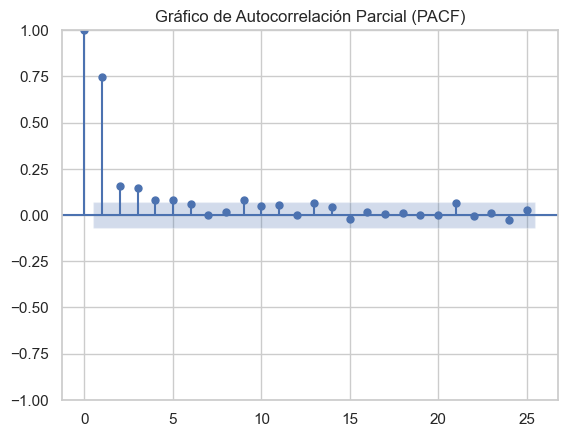

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
file_path = '/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BilbaoTempTiendas_def.csv'
df = pd.read_csv(file_path)
# Cargar datos - asegúrate de que tu DataFrame 'df' esté cargado y la columna de fecha esté en formato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])
df.set_index('FECHA', inplace=True)

# Asegúrate de que 'cantidad_total' es una serie temporal numérica
# Aquí 'cantidad_total' es el nombre de la columna que quieres analizar

# Gráfico de la Función de Autocorrelación (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['CANTIDAD_TOTAL'], lags=25)  # Puedes ajustar el número de lags según la frecuencia y el tamaño de los datos
plt.title('Gráfico de Autocorrelación (ACF)')

# Gráfico de la Función de Autocorrelación Parcial (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['CANTIDAD_TOTAL'], lags=25, method='ywm')  # método 'ywm' para estimación más robusta
plt.title('Gráfico de Autocorrelación Parcial (PACF)')

plt.show()


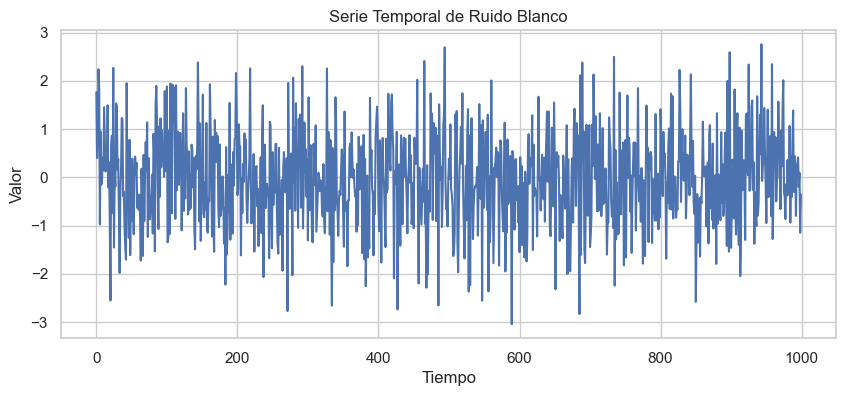

<Figure size 1000x400 with 0 Axes>

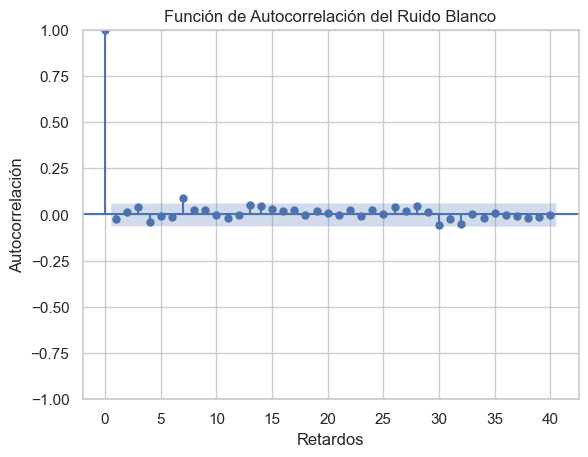

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
file_path = '/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/BilbaoTempTiendas_def.csv'
df = pd.read_csv(file_path)
# Generar ruido blanco
np.random.seed(0)  # Para reproducibilidad
ruido_blanco = np.random.normal(loc=0, scale=1, size=1000)  # media 0, desviación estándar 1, 1000 puntos

# Graficar el ruido blanco
plt.figure(figsize=(10, 4))
plt.plot(ruido_blanco)
plt.title('Serie Temporal de Ruido Blanco')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

# Función de autocorrelación para ruido blanco
plt.figure(figsize=(10, 4))
plot_acf(ruido_blanco, lags=40)
plt.title('Función de Autocorrelación del Ruido Blanco')
plt.xlabel('Retardos')
plt.ylabel('Autocorrelación')
plt.show()
